In [3]:
!pip install pandas matplotlib --quiet

You should consider upgrading via the '/home/alex/Study/pathplanning/venv/bin/python -m pip install --upgrade pip' command.


In [25]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [28]:
data = []
for r, d, f in os.walk("./"):
    if r.count("/") == 3:
        data.extend([pd.read_csv(f"{r}/{file}") for file in filter(lambda s: s.endswith(".csv"), f)])

In [4]:
df = pd.concat(data, ignore_index=True)
df = df.drop("Unnamed: 0", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_x             18000 non-null  float64
 1   start_y             18000 non-null  float64
 2   end_x               18000 non-null  float64
 3   end_y               18000 non-null  float64
 4   euclidian_distance  18000 non-null  float64
 5   max_edge_len        18000 non-null  float64
 6   goal_rate           18000 non-null  float64
 7   finished            18000 non-null  bool   
 8   iter_count          15001 non-null  float64
 9   final_distance      15001 non-null  float64
dtypes: bool(1), float64(9)
memory usage: 1.3 MB


In [5]:
df["dist_bin"] = pd.cut(df.euclidian_distance, int(df.euclidian_distance.max() // 10), labels=False, retbins=False, right=True)

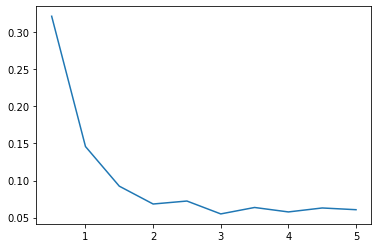

In [6]:
df[df.finished == False].max_edge_len.value_counts(normalize=True).sort_index().plot();

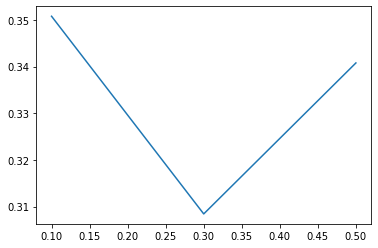

In [17]:
df[df.finished == False].goal_rate.value_counts(normalize=True).sort_index().plot();

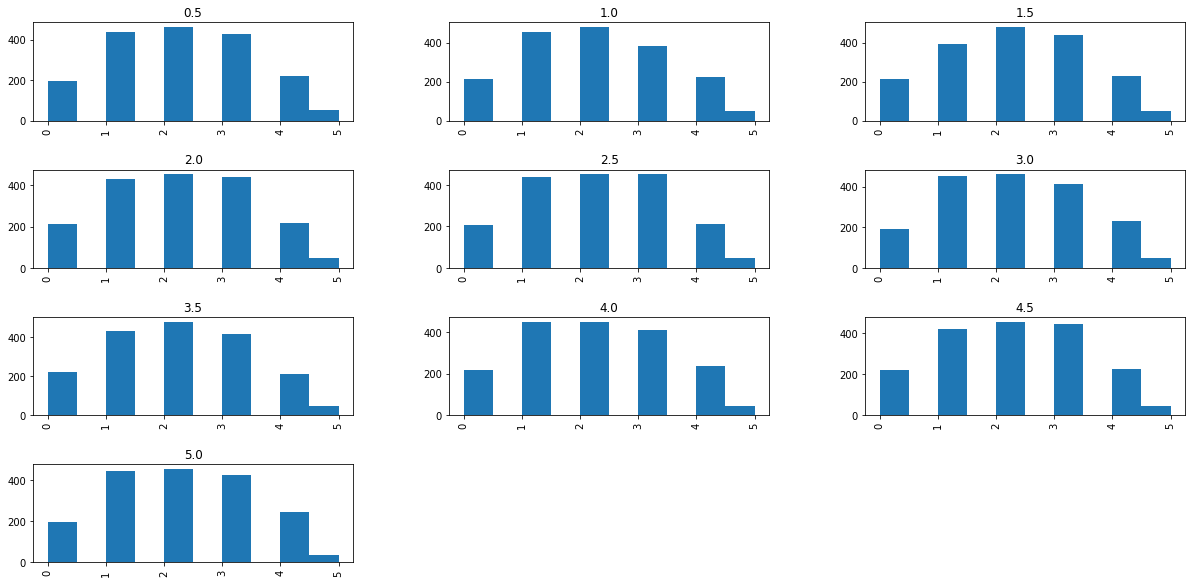

In [7]:
df.dist_bin.hist(by=df.max_edge_len, figsize=(20, 10));

In [8]:
df

,start_x,start_y,end_x,end_y,euclidian_distance,max_edge_len,goal_rate,finished,iter_count,final_distance,dist_bin
0,36.557210,42.216658,23.898891,43.714430,12.746622,3.5,0.3,True,96.0,26.444547,1
1,4.000558,43.559987,10.356112,22.554438,21.945983,3.5,0.3,False,NaN,NaN,2
2,10.356112,22.554438,23.965557,46.247763,27.323811,3.5,0.3,True,298.0,37.561317,2
3,23.854445,5.958887,23.965557,46.247763,40.289029,3.5,0.3,True,807.0,72.702385,3
4,36.557210,42.216658,45.444989,17.554440,26.214835,3.5,0.3,True,150.0,36.989411,2
...,...,...,...,...,...,...,...,...,...,...,...
17995,23.987779,13.336662,48.561654,19.013332,25.221021,1.5,0.1,True,1424.0,29.503361,2
17996,23.832223,22.269993,40.000545,4.160000,24.277283,1.5,0.1,True,933.0,31.046469,2
17997,4.000558,43.559987,10.356112,22.554438,21.945983,1.5,0.1,True,873.0,39.827790,2
17998,23.787779,3.425555,39.911656,29.359992,30.538082,1.5,0.1,True,668.0,44.545345,2


In [9]:
df["distance_diff"] = df["final_distance"] - df["euclidian_distance"]

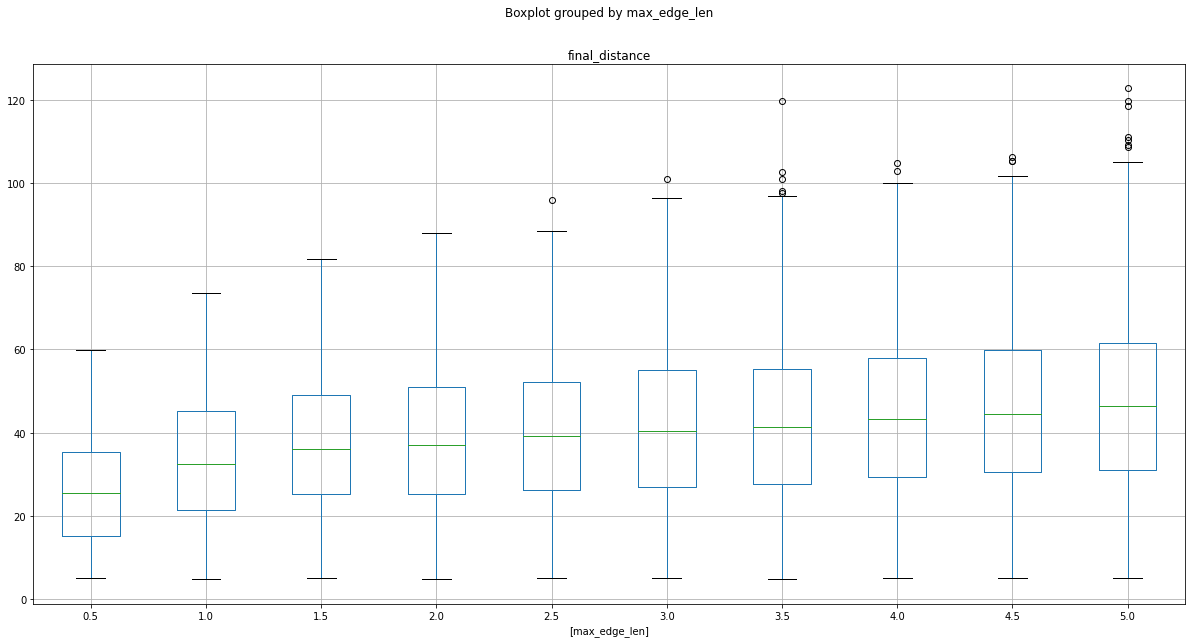

In [16]:
df[["final_distance", "max_edge_len"]].boxplot(by="max_edge_len", figsize=(20, 10));